<a href="https://colab.research.google.com/github/kellinpelrine/retail_video_analytics/blob/master/prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# some code from https://dev.to/kojikanao/yolo-on-google-colab-4b8e
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 12564, done.
remote: Total 12564 (delta 0), reused 0 (delta 0), pack-reused 12564
Receiving objects: 100% (12564/12564), 11.62 MiB | 1.01 MiB/s, done.
Resolving deltas: 100% (8538/8538), done.


In [38]:
cd darknet

/content/darknet


In [0]:
!cp '/content/gdrive/My Drive/detector.c' './src/detector.c'
!cp '/content/gdrive/My Drive/image.c' './src/image.c'

In [5]:
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make
#!pip install opencv-python

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
In file included from ./src/http

In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-02-29 05:20:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  3.00MB/s    in 88s     

2020-02-29 05:22:18 (2.69 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
import glob
frame_list = sorted(glob.glob('/content/gdrive/My Drive/Seq_2 (1)/*.jpg'))
with open('/content/gdrive/My Drive/input_images.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % path for path in frame_list)

In [39]:
#path = "/content/gdrive/My Drive/Retail Analytics Data/Video_Set_4/ID_131/Camera_1/Seq_1.avi"

#!./darknet detect cfg/yolov3.cfg yolov3.weights "/content/gdrive/My Drive/Seq_1/*"
#!./darknet detect cfg/yolov3.cfg yolov3.weights "/content/gdrive/My Drive/Seq_1/video0128.jpg"
#!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show "/content/gdrive/My Drive/Retail Analytics Data/Video_Set_1/ID_02/Camera_3/Seq_1.avi" -out_filename res.avi
#!./darknet detect cfg/coco.data cfg/yolov3.cfg yolov3.weights "/content/gdrive/My Drive/Seq_1/video0128.jpg"

#!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -thresh 0.015 -iou_thresh 0.999999999 -dont_show "/content/gdrive/My Drive/video0320.jpg" -out_filename predictions.jpg --labels person

!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show -ext_output < "/content/gdrive/My Drive/input_images.txt" > "/content/gdrive/My Drive/result2(1).txt"
#!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights  -dont_show -ext_output "/content/gdrive/My Drive/video0320.jpg" 

 CUDA-version: 10000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

In [0]:
import re

with open('/content/gdrive/My Drive/result2(1).txt') as f:
    lines = [line.rstrip() for line in f]
del lines[:5]
del lines[-1]

bbox_list = []
counter = 1
for line in lines:
  if line == 'Enter Image Path:':
    counter += 1
    continue
  line = re.sub(r'person: [0-9]+%|\)', '',line)
  bbox_dims = line.split()
  new_line = str(int(counter)) + ',-1,' + bbox_dims[0] + ',' + bbox_dims[1] + ',' + bbox_dims[2] + ',' + bbox_dims[3] + ',' + bbox_dims[4] + ',-1,-1,-1'
  bbox_list.append(new_line)

with open('/content/gdrive/My Drive/det_yolo3_2(1).txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % bbox for bbox in bbox_list)

In [60]:
cd ..

/content


In [10]:
!git clone https://github.com/abhyantrika/nanonets_object_tracking

Cloning into 'nanonets_object_tracking'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 91 (delta 15), reused 67 (delta 3), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [61]:
cd nanonets_object_tracking/

/content/nanonets_object_tracking


In [12]:
!pip install -r requirements.txt

     |████████████████████████████████| 25.4MB 118kB/s 
     |████████████████████████████████| 13.0MB 26.1MB/s 
     |████████████████████████████████| 24.8MB 1.3MB/s 
     |████████████████████████████████| 411.0MB 42kB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 582.5MB 24kB/s 
     |████████████████████████████████| 686kB 45.9MB/s 
     |████████████████████████████████| 17.3MB 195kB/s 
     |████████████████████████████████| 2.1MB 43.8MB/s 
     |████████████████████████████████| 6.7MB 17.1MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
  Created wheel for nonechucks: filename=nonechucks-0.3.1-cp36-none-any.whl size=9366 sha256=46799dd9c10bf581937e5ce000f621e27c7d50af2646b700461a5dc540fa103b
  Stored in directory: /root/.cache/pip/wheels/d1/81/6d/c4984a169f36e27cc2e7c65d4f6e52d51f5ee66080065144d1
Successfully built nonechucks
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 w

In [0]:
!cp '/content/gdrive/My Drive/det_yolo3_2(1).txt' './det/det_yolo3_2(1).txt'

In [49]:
from __future__ import print_function, division

import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import scipy.io
import yaml
import math
from model import ft_net, ft_net_dense, ft_net_NAS, PCB, PCB_test

#fp16
try:
    from apex.fp16_utils import *
except ImportError: # will be 3.x series
    print('This is not an error. If you want to use low precision, i.e., fp16, please install the apex with cuda support (https://github.com/NVIDIA/apex) and update pytorch to 1.0')
######################################################################
# Options
# --------


class Args:
  fp16 = ''
  PCB = ''
  use_dense = ''
  use_NAS = ''
  stride = ''
 

opt = Args()

opt.multi = False
opt.batchsize = 128

config_path = os.path.join('./model/PCB','opts.yaml')
with open(config_path, 'r') as stream:
        config = yaml.load(stream)
opt.fp16 = config['fp16'] 
opt.PCB = config['PCB']
opt.use_dense = config['use_dense']
opt.use_NAS = False
opt.stride = config['stride']

if 'nclasses' in config: # tp compatible with old config files
    opt.nclasses = config['nclasses']
else: 
    opt.nclasses = 751 

str_ids = '0'
gpu_ids = [0]
#which_epoch = opt.which_epoch
name = 'PCB'
test_dir = "/content/gdrive/My Drive"



print('We use the scale: %s'%'1')
str_ms = '1'
ms = []
for s in str_ms:
    s_f = float(s)
    ms.append(math.sqrt(s_f))

# set gpu ids
if len(gpu_ids)>0:
    torch.cuda.set_device(gpu_ids[0])
    cudnn.benchmark = True

######################################################################
# Load Data
# ---------
#
# We will use torchvision and torch.utils.data packages for loading the
# data.
#
data_transforms = transforms.Compose([
        transforms.Resize((256,128), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
############### Ten Crop        
        #transforms.TenCrop(224),
        #transforms.Lambda(lambda crops: torch.stack(
         #   [transforms.ToTensor()(crop) 
          #      for crop in crops]
           # )),
        #transforms.Lambda(lambda crops: torch.stack(
         #   [transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(crop)
          #       for crop in crops]
          # ))
])

if opt.PCB:
    data_transforms = transforms.Compose([
        transforms.Resize((384,192), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ])

######################################################################
# Load model
#---------------------------
def load_network(network):
    #save_path = os.path.join('./model',name,'net_%s.pth'%opt.which_epoch)
    save_path = os.path.join('./model',name,'net_last.pth')
    network.load_state_dict(torch.load(save_path))
    return network


######################################################################
# Extract feature
# ----------------------
#
# Extract feature from  a trained model.
#
def fliplr(img):
    '''flip horizontal'''
    inv_idx = torch.arange(img.size(3)-1,-1,-1).long()  # N x C x H x W
    img_flip = img.index_select(3,inv_idx)
    return img_flip

def extract_feature(model,dataloaders):
    features = torch.FloatTensor()
    count = 0
    for data in dataloaders:
        img, label = data
        n, c, h, w = img.size()
        count += n
        print(count)
        ff = torch.FloatTensor(n,512).zero_().cuda()
        if opt.PCB:
            ff = torch.FloatTensor(n,2048,6).zero_().cuda() # we have six parts

        for i in range(2):
            if(i==1):
                img = fliplr(img)
            input_img = Variable(img.cuda())
            for scale in ms:
                if scale != 1:
                    # bicubic is only  available in pytorch>= 1.1
                    input_img = nn.functional.interpolate(input_img, scale_factor=scale, mode='bicubic', align_corners=False)
                outputs = model(input_img) 
                ff += outputs
        # norm feature
        if opt.PCB:
            # feature size (n,2048,6)
            # 1. To treat every part equally, I calculate the norm for every 2048-dim part feature.
            # 2. To keep the cosine score==1, sqrt(6) is added to norm the whole feature (2048*6).
            fnorm = torch.norm(ff, p=2, dim=1, keepdim=True) * np.sqrt(6) 
            ff = ff.div(fnorm.expand_as(ff))
            ff = ff.view(ff.size(0), -1)
        else:
            fnorm = torch.norm(ff, p=2, dim=1, keepdim=True)
            ff = ff.div(fnorm.expand_as(ff))

        features = torch.cat((features,ff.data.cpu()), 0)
    return features

def extract_feature_query(model,dataloaders):
    features = torch.FloatTensor()
    count = 0
    for data in dataloaders:
        img = data
        n, c, h, w = img.size()
        count += n
        print(count)
        ff = torch.FloatTensor(n,512).zero_().cuda()
        if opt.PCB:
            ff = torch.FloatTensor(n,2048,6).zero_().cuda() # we have six parts

        for i in range(2):
            if(i==1):
                img = fliplr(img)
            input_img = Variable(img.cuda())
            for scale in ms:
                if scale != 1:
                    # bicubic is only  available in pytorch>= 1.1
                    input_img = nn.functional.interpolate(input_img, scale_factor=scale, mode='bicubic', align_corners=False)
                outputs = model(input_img) 
                ff += outputs
        # norm feature
        if opt.PCB:
            # feature size (n,2048,6)
            # 1. To treat every part equally, I calculate the norm for every 2048-dim part feature.
            # 2. To keep the cosine score==1, sqrt(6) is added to norm the whole feature (2048*6).
            fnorm = torch.norm(ff, p=2, dim=1, keepdim=True) * np.sqrt(6) 
            ff = ff.div(fnorm.expand_as(ff))
            ff = ff.view(ff.size(0), -1)
        else:
            fnorm = torch.norm(ff, p=2, dim=1, keepdim=True)
            ff = ff.div(fnorm.expand_as(ff))

        features = torch.cat((features,ff.data.cpu()), 0)
    return features

def get_id(img_path):
  camera_id = []
  labels = []
  for path, v in img_path:
      filename = path.split('/')[-2:]
      label = filename[0][6:]
      camera = [0]
      if label[0:2]=='-1':
          labels.append(-1)
      else:
          labels.append(int(label))
      camera_id.append(int(camera[0]))
  return camera_id, labels

This is not an error. If you want to use low precision, i.e., fp16, please install the apex with cuda support (https://github.com/NVIDIA/apex) and update pytorch to 1.0
We use the scale: 1


In [0]:
import scipy.io
import torch
import numpy as np
#import time
import os
from collections import Counter

#######################################################################
# Evaluate
def evaluate(qf,ql,qc,gf,gl,gc):
    #query = qf.view(-1,1)
    # print(query.shape)
    score = torch.mm(gf,query)
    score = score.squeeze(1).cpu()
    score = score.numpy()
    # predict index
    index = np.argsort(score)  #from small to large
    index = index[::-1]
    # index = index[0:2000]
    # good index
    query_index = np.argwhere(gl==ql)
    #camera_index = np.argwhere(gc==qc)

    #good_index = np.setdiff1d(query_index, camera_index, assume_unique=True)
    good_index = query_index
    junk_index1 = np.argwhere(gl==-1)
    #junk_index2 = np.intersect1d(query_index, camera_index)
    #junk_index = np.append(junk_index2, junk_index1) #.flatten())
    junk_index = junk_index1
    
    CMC_tmp = compute_mAP(index, good_index, junk_index)
    return CMC_tmp

def evaluate2(qf,gf,gl):
    query = qf.view(-1,1)
    # print(query.shape)
    score = torch.mm(gf,query)
    score = score.squeeze(1).cpu()
    score = score.numpy()
    # predict index
    index = np.argsort(score)  #from small to large
    index = index[::-1][:5]
    gl_indexed = [gl[idx] for idx in index]
    c = Counter(gl_indexed)
    value, count = c.most_common()[0] #take majority vote
    indexer2 = [index2 for index2 in index if gl[index2] == value]
    overall = sum(score[indexer2]) / count
    print(overall)
    if overall > .7:  
      return value
    else:
      return -1


def compute_mAP(index, good_index, junk_index):
    ap = 0
    cmc = torch.IntTensor(len(index)).zero_()
    if good_index.size==0:   # if empty
        cmc[0] = -1
        return ap,cmc

    # remove junk_index
    mask = np.in1d(index, junk_index, invert=True)
    index = index[mask]

    # find good_index index
    ngood = len(good_index)
    mask = np.in1d(index, good_index)
    rows_good = np.argwhere(mask==True)
    rows_good = rows_good.flatten()
    
    cmc[rows_good[0]:] = 1
    for i in range(ngood):
        d_recall = 1.0/ngood
        precision = (i+1)*1.0/(rows_good[i]+1)
        if rows_good[i]!=0:
            old_precision = i*1.0/rows_good[i]
        else:
            old_precision=1.0
        ap = ap + d_recall*(old_precision + precision)/2

    return ap, cmc

######################################################################

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader

import numpy as np

class RoiDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x
    
    def __len__(self):
        return len(self.data)


data_transforms_query = transforms.Compose([
        transforms.ToPILImage(),                                    
        transforms.Resize((256,128), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

if opt.PCB:
    data_transforms_query = transforms.Compose([
        transforms.ToPILImage(),  
        transforms.Resize((384,192), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ])

In [0]:
# clean up gallery/query
import shutil
shutil.rmtree("/content/gdrive/My Drive/gallery") 
shutil.rmtree("/content/gdrive/My Drive/query") 

import os
os.mkdir("/content/gdrive/My Drive/gallery")
os.mkdir("/content/gdrive/My Drive/query")


In [74]:
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset,TensorDataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import cv2,pickle,sys
import os
import shutil

from deepsort import *


def get_gt(image,frame_id,gt_dict):

	if frame_id not in gt_dict.keys() or gt_dict[frame_id]==[]:
		return None,None
		#return None,None,None

	frame_info = gt_dict[frame_id]

	detections = []
	ids = []
	out_scores = []
	for i in range(len(frame_info)):

		coords = frame_info[i]['coords']

		x1,y1,w,h = coords
		x2 = x1 + w
		y2 = y1 + h

		xmin = min(x1,x2)
		xmax = max(x1,x2)
		ymin = min(y1,y2)
		ymax = max(y1,y2)	

		detections.append([x1,y1,w,h])
		out_scores.append(frame_info[i]['conf'])

	return detections,out_scores


def get_dict(filename):
	with open(filename) as f:	
		d = f.readlines()

	d = list(map(lambda x:x.strip(),d))

	last_frame = int(d[-1].split(',')[0])

	gt_dict = {x:[] for x in range(last_frame+1)}

	for i in range(len(d)):
		a = list(d[i].split(','))
		a = list(map(float,a))	

		coords = a[2:6]
		confidence = a[6]
		gt_dict[a[0]].append({'coords':coords,'conf':confidence})

	return gt_dict

def get_mask(filename):
	mask = cv2.imread(filename,0)
	mask = mask / 255.0
	return mask





#Load detections for the video. Options available: yolo,ssd and mask-rcnn
filename = 'det/det_yolo3_2(1).txt'
gt_dict = get_dict(filename)

cap = cv2.VideoCapture("/content/gdrive/My Drive/Retail Analytics Data/Video_Set_4/ID_116/Camera_8/Seq_2.avi")

#an optional mask for the given video, to focus on the road. 
#mask = get_mask('roi.jpg')

#Initialize deep sort.
deepsort = deepsort_rbc()

frame_id = 1

#mask = np.expand_dims(mask,2)
#mask = np.repeat(mask,3,2)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter("/content/gdrive/My Drive/tracked.avi",fourcc, 10.0, (1920,1080))
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
clip_width = 192
clip_height = 384
out = cv2.VideoWriter("/content/gdrive/My Drive/tracked_2(1).avi",fourcc, 15.0,(frame_width,frame_height))


#initialize reID

data_dir = test_dir
use_gpu = torch.cuda.is_available()
######################################################################
# Load Collected data Trained model
print('-------test-----------')
if opt.use_dense:
    model_structure = ft_net_dense(opt.nclasses)
elif opt.use_NAS:
    model_structure = ft_net_NAS(opt.nclasses)
else:
    model_structure = ft_net(opt.nclasses, stride = opt.stride)

if opt.PCB:
    model_structure = PCB(opt.nclasses)

#if opt.fp16:
#    model_structure = network_to_half(model_structure)

model = load_network(model_structure)

# Remove the final fc layer and classifier layer
if opt.PCB:
    #if opt.fp16:
    #    model = PCB_test(model[1])
    #else:
        model = PCB_test(model)
else:
    #if opt.fp16:
        #model[1].model.fc = nn.Sequential()
        #model[1].classifier = nn.Sequential()
    #else:
        model.classifier.classifier = nn.Sequential()

# Change to test mode
model = model.eval()
if use_gpu:
    model = model.cuda()


gallery_loaded = False

while True:
  print(frame_id)		

  ret,frame = cap.read()
  if ret is False:
    frame_id+=1
    break	

  #frame = frame * mask
  frame = frame.astype(np.uint8)

  detections,out_scores = get_gt(frame,frame_id,gt_dict)

  if detections is None:
    print("No dets")    
    out.write(frame)
    frame_id+=1
    continue

  detections = np.array(detections)
  out_scores = np.array(out_scores) 

  tracker,detections_class = deepsort.run_deep_sort(frame,out_scores,detections)

  track_reID = []
  
  if frame_id < 10:
    for track in tracker.tracks:
      if not track.is_confirmed() or track.time_since_update > 1:
        continue
      
      bbox = track.to_tlbr() #Get the corrected/predicted bounding box
      roi = frame[np.maximum(int(bbox[1]),0):np.maximum(int(bbox[3]),0), np.maximum(int(bbox[0]),0):np.maximum(int(bbox[2]),0)]
      roi = cv2.resize(roi,(clip_width,clip_height),interpolation=cv2.INTER_CUBIC)
      if not os.path.isdir("/content/gdrive/My Drive/gallery/person{}".format(track.track_id)):
        os.mkdir("/content/gdrive/My Drive/gallery/person{}".format(track.track_id))
      cv2.imwrite( "/content/gdrive/My Drive/gallery/person{}/{}.jpg".format(track.track_id,frame_id), roi )

  else:

    if not gallery_loaded:
      image_datasets = {'gallery': datasets.ImageFolder( os.path.join(data_dir,'gallery') ,data_transforms)}
      dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=opt.batchsize,
                                              shuffle=False, num_workers=16) for x in ['gallery']}

      gallery_path = image_datasets['gallery'].imgs
      gallery_cam,gallery_label = get_id(gallery_path)
      
      with torch.no_grad():
        gallery_feature = extract_feature(model,dataloaders['gallery'])

      gallery_loaded = True

    roi_list = []
    for track in tracker.tracks:
      if not track.is_confirmed() or track.time_since_update > 1:
        continue
      
      bbox = track.to_tlbr() #Get the corrected/predicted bounding box
      roi_temp = frame[np.maximum(int(bbox[1]),0):np.maximum(int(bbox[3]),0), np.maximum(int(bbox[0]),0):np.maximum(int(bbox[2]),0)]
      roi_temp = cv2.resize(roi_temp,(clip_width,clip_height),interpolation=cv2.INTER_CUBIC)
      roi_list.append(roi_temp)
    
    roi_converted = []
    for roi_img in roi_list:
      roi_converted.append(cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB))
    roi = np.stack(roi_converted,axis=0)

    query_dataset = RoiDataset(roi, data_transforms_query)
    query_dataloader = torch.utils.data.DataLoader(query_dataset, batch_size=opt.batchsize,
                                            shuffle=False, num_workers=16)

    # Extract feature
    with torch.no_grad():
        query_feature = extract_feature_query(model,query_dataloader)

    proposed_labels = []
    for i in range(query_feature.shape[0]):
      proposed_labels.append(evaluate2(query_feature[i],gallery_feature,gallery_label))
    print("Proposed labels:" )
    print(proposed_labels)

    roi_counter = 0
    query_labels = []
    for pl in proposed_labels:
      if pl != -1:
        cv2.imwrite( "/content/gdrive/My Drive/gallery/person{}/{}.jpg".format(pl,frame_id), roi_list[roi_counter] )
        track_reID.append(pl)
        query_labels.append(pl)
      else:
        if not os.path.isdir("/content/gdrive/My Drive/gallery/person{}".format(tracker.tracks[roi_counter].track_id)):
          os.mkdir("/content/gdrive/My Drive/gallery/person{}".format(track.track_id))
        cv2.imwrite( "/content/gdrive/My Drive/gallery/person{}/{}.jpg".format(tracker.tracks[roi_counter].track_id,frame_id), roi_list[roi_counter] )
        track_reID.append(tracker.tracks[roi_counter].track_id)
        query_labels.append(tracker.tracks[roi_counter].track_id)
      
      roi_counter += 1

    gallery_feature = torch.cat((gallery_feature, query_feature), 0)
    gallery_label = gallery_label + query_labels 

  reID_index = 0
  for track in tracker.tracks:
    if not track.is_confirmed() or track.time_since_update > 1:
      continue

    

    bbox = track.to_tlbr() #Get the corrected/predicted bounding box
    id_num = str(track.track_id) #Get the ID for the particular track.
    features = track.features #Get the feature vector corresponding to the detection.

    #Draw bbox from tracker.
    cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),(255,255,255), 2)
    if frame_id < 10:
      cv2.putText(frame, str(id_num),(int(bbox[0]), int(bbox[1])),0, 5e-3 * 200, (0,255,0),2)
    else:
      cv2.putText(frame, str(track_reID[reID_index]),(int(bbox[0]), int(bbox[1])),0, 5e-3 * 200, (0,255,0),2)
    reID_index += 1 

    #Draw bbox from detector. Just to compare.
    #for det in detections_class:
    #  bbox = det.to_tlbr()
    #  cv2.rectangle(frame,(int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),(255,255,0), 2)
  
  out.write(frame)
  frame_id+=1

out.release()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'siamese_net.SiameseNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch

Deep sort model loaded
-------test-----------
1
No dets
2
No dets
3
No dets
4
No dets
5
No dets
6
No dets
7
No dets
8
No dets
9
No dets
10
No dets
11
No dets
12
No dets
13
No dets
14
No dets
15
No dets
16
No dets
17
No dets
18
No dets
19
No dets
20
No dets
21
No dets
22
No dets
23
No dets
24
No dets
25
No dets
26
No dets
27
No dets
28
No dets
29
No dets
30
No dets
31
No dets
32
No dets
33
No dets
34
No dets
35
No dets
36
No dets
37
No dets
38
No dets
39
No dets
40


RuntimeError: ignored

In [0]:
!sed -i 's/self.n_init = n_init/self.n_init = 10/g' './deep_sort/deep_sort/tracker.py'







In [0]:
'''
class RoiDataset(Dataset):
    def __init__(self, data, transform=None):
        #self.data = torch.from_numpy(data).float()
        self.data = data
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x
    
    def __len__(self):
        return len(self.data)


data_transforms_query = transforms.Compose([
        transforms.ToPILImage(),                                    
        transforms.Resize((256,128), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

if opt.PCB:
    data_transforms_query = transforms.Compose([
        transforms.ToPILImage(),  
        transforms.Resize((384,192), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ])

    data_transforms = transforms.Compose([
        transforms.Resize((384,192), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ])
'''

test_img = cv2.imread(os.path.join(data_dir,'gallery','person1','3.jpg'))

test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # switch color to PIL format
test_img = np.expand_dims(test_img, axis=0) # expand to add batch size dimension

#from PIL import Image
#test_img=Image.fromarray(test_img)
image_datasets = {'gallery': datasets.ImageFolder( os.path.join(data_dir,'gallery') ,data_transforms), 'query' : RoiDataset(test_img, data_transforms_query)}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=opt.batchsize,
                                              shuffle=False, num_workers=16) for x in ['gallery','query']}




In [142]:
gallery_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

In [120]:
for data in dataloaders['gallery']:
  print(data)

print('Query:')
for data in dataloaders['query']:
  print(data)

[tensor([[[[ 2.0263,  2.0263,  2.0263,  ...,  0.5707,  0.5707,  0.5536],
          [ 2.0092,  2.0092,  2.0092,  ...,  0.6049,  0.6049,  0.5878],
          [ 1.9578,  1.9749,  1.9749,  ...,  0.6906,  0.6906,  0.6734],
          ...,
          [ 1.5468,  1.5639,  1.5982,  ..., -1.6727, -1.7412, -1.7583],
          [ 1.6838,  1.7009,  1.7352,  ..., -1.4672, -1.5357, -1.5699],
          [ 1.7523,  1.7694,  1.7865,  ..., -1.3987, -1.4843, -1.4843]],

         [[ 2.2185,  2.2185,  2.2185,  ...,  0.7304,  0.7304,  0.7129],
          [ 2.2010,  2.2010,  2.2010,  ...,  0.7654,  0.7654,  0.7479],
          [ 2.1485,  2.1660,  2.1660,  ...,  0.8529,  0.8529,  0.8354],
          ...,
          [ 1.7108,  1.7283,  1.7633,  ..., -1.5980, -1.6681, -1.6856],
          [ 1.8508,  1.8683,  1.9034,  ..., -1.3880, -1.4580, -1.4930],
          [ 1.9209,  1.9384,  1.9559,  ..., -1.3179, -1.4055, -1.4055]],

         [[ 2.3437,  2.3437,  2.3437,  ...,  0.8622,  0.8622,  0.8448],
          [ 2.3263,  2.3263, 

In [14]:
cd ..

/content


In [15]:
!git clone https://github.com/layumi/Person_reID_baseline_pytorch.git

Cloning into 'Person_reID_baseline_pytorch'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 930 (delta 9), reused 1 (delta 0), pack-reused 914
Receiving objects: 100% (930/930), 1.14 MiB | 897.00 KiB/s, done.
Resolving deltas: 100% (546/546), done.


In [0]:
cp -r Person_reID_baseline_pytorch/* nanonets_object_tracking/

In [17]:
cd nanonets_object_tracking/

/content/nanonets_object_tracking


In [0]:
cd Person_reID_baseline_pytorch/

/content/Person_reID_baseline_pytorch


In [0]:
!cp -r '/content/gdrive/My Drive/model' './model/PCB'

In [19]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=36ed26e96fc04ac368ebf009a26269a80025f6525ad7cda5a4308ae4e677f391
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [0]:
from __future__ import print_function, division

import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import scipy.io
import yaml
import math
from model import ft_net, ft_net_dense, ft_net_NAS, PCB, PCB_test

#fp16
try:
    from apex.fp16_utils import *
except ImportError: # will be 3.x series
    print('This is not an error. If you want to use low precision, i.e., fp16, please install the apex with cuda support (https://github.com/NVIDIA/apex) and update pytorch to 1.0')
######################################################################
# Options
# --------
'''
parser = argparse.ArgumentParser(description='Training')
parser.add_argument('--gpu_ids',default='0', type=str,help='gpu_ids: e.g. 0  0,1,2  0,2')
parser.add_argument('--which_epoch',default='last', type=str, help='0,1,2,3...or last')
parser.add_argument('--test_dir',default='../Market/pytorch',type=str, help='./test_data')
parser.add_argument('--name', default='ft_ResNet50', type=str, help='save model path')
parser.add_argument('--batchsize', default=256, type=int, help='batchsize')
parser.add_argument('--use_dense', action='store_true', help='use densenet121' )
parser.add_argument('--PCB', action='store_true', help='use PCB' )
parser.add_argument('--multi', action='store_true', help='use multiple query' )
parser.add_argument('--fp16', action='store_true', help='use fp16.' )
parser.add_argument('--ms',default='1', type=str,help='multiple_scale: e.g. 1 1,1.1  1,1.1,1.2')

opt = parser.parse_args()
###load config###
# load the training config
config_path = os.path.join('./model',opt.name,'opts.yaml')
with open(config_path, 'r') as stream:
        config = yaml.load(stream)
opt.fp16 = config['fp16'] 
opt.PCB = config['PCB']
opt.use_dense = config['use_dense']
opt.use_NAS = config['use_NAS']
opt.stride = config['stride']

if 'nclasses' in config: # tp compatible with old config files
    opt.nclasses = config['nclasses']
else: 
    opt.nclasses = 751 

str_ids = opt.gpu_ids.split(',')
#which_epoch = opt.which_epoch
name = opt.name
test_dir = opt.test_dir

gpu_ids = []
for str_id in str_ids:
    id = int(str_id)
    if id >=0:
        gpu_ids.append(id)

print('We use the scale: %s'%opt.ms)
str_ms = opt.ms.split(',')
ms = []
for s in str_ms:
    s_f = float(s)
    ms.append(math.sqrt(s_f))

# set gpu ids
if len(gpu_ids)>0:
    torch.cuda.set_device(gpu_ids[0])
    cudnn.benchmark = True
'''

class Args:
  fp16 = ''
  PCB = ''
  use_dense = ''
  use_NAS = ''
  stride = ''
 

opt = Args()

opt.multi = False
opt.batchsize = 64

config_path = os.path.join('./model/PCB','opts.yaml')
with open(config_path, 'r') as stream:
        config = yaml.load(stream)
opt.fp16 = config['fp16'] 
opt.PCB = config['PCB']
opt.use_dense = config['use_dense']
opt.use_NAS = False
opt.stride = config['stride']

if 'nclasses' in config: # tp compatible with old config files
    opt.nclasses = config['nclasses']
else: 
    opt.nclasses = 751 

str_ids = '0'
gpu_ids = [0]
#which_epoch = opt.which_epoch
name = 'PCB'
test_dir = "/content/gdrive/My Drive"



print('We use the scale: %s'%'1')
str_ms = '1'
ms = []
for s in str_ms:
    s_f = float(s)
    ms.append(math.sqrt(s_f))

# set gpu ids
if len(gpu_ids)>0:
    torch.cuda.set_device(gpu_ids[0])
    cudnn.benchmark = True

######################################################################
# Load Data
# ---------
#
# We will use torchvision and torch.utils.data packages for loading the
# data.
#
data_transforms = transforms.Compose([
        transforms.Resize((256,128), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
############### Ten Crop        
        #transforms.TenCrop(224),
        #transforms.Lambda(lambda crops: torch.stack(
         #   [transforms.ToTensor()(crop) 
          #      for crop in crops]
           # )),
        #transforms.Lambda(lambda crops: torch.stack(
         #   [transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(crop)
          #       for crop in crops]
          # ))
])

if opt.PCB:
    data_transforms = transforms.Compose([
        transforms.Resize((384,192), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ])


data_dir = test_dir

if opt.multi:
    image_datasets = {x: datasets.ImageFolder( os.path.join(data_dir,x) ,data_transforms) for x in ['gallery','query','multi-query']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=opt.batchsize,
                                             shuffle=False, num_workers=16) for x in ['gallery','query','multi-query']}
else:
    image_datasets = {x: datasets.ImageFolder( os.path.join(data_dir,x) ,data_transforms) for x in ['gallery','query']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=opt.batchsize,
                                             shuffle=False, num_workers=16) for x in ['gallery','query']}
class_names = image_datasets['query'].classes
use_gpu = torch.cuda.is_available()

######################################################################
# Load model
#---------------------------
def load_network(network):
    #save_path = os.path.join('./model',name,'net_%s.pth'%opt.which_epoch)
    save_path = os.path.join('./model',name,'net_last.pth')
    network.load_state_dict(torch.load(save_path))
    return network


######################################################################
# Extract feature
# ----------------------
#
# Extract feature from  a trained model.
#
def fliplr(img):
    '''flip horizontal'''
    inv_idx = torch.arange(img.size(3)-1,-1,-1).long()  # N x C x H x W
    img_flip = img.index_select(3,inv_idx)
    return img_flip

def extract_feature(model,dataloaders):
    features = torch.FloatTensor()
    count = 0
    for data in dataloaders:
        img, label = data
        n, c, h, w = img.size()
        count += n
        print(count)
        ff = torch.FloatTensor(n,512).zero_().cuda()
        if opt.PCB:
            ff = torch.FloatTensor(n,2048,6).zero_().cuda() # we have six parts

        for i in range(2):
            if(i==1):
                img = fliplr(img)
            input_img = Variable(img.cuda())
            for scale in ms:
                if scale != 1:
                    # bicubic is only  available in pytorch>= 1.1
                    input_img = nn.functional.interpolate(input_img, scale_factor=scale, mode='bicubic', align_corners=False)
                outputs = model(input_img) 
                ff += outputs
        # norm feature
        if opt.PCB:
            # feature size (n,2048,6)
            # 1. To treat every part equally, I calculate the norm for every 2048-dim part feature.
            # 2. To keep the cosine score==1, sqrt(6) is added to norm the whole feature (2048*6).
            fnorm = torch.norm(ff, p=2, dim=1, keepdim=True) * np.sqrt(6) 
            ff = ff.div(fnorm.expand_as(ff))
            ff = ff.view(ff.size(0), -1)
        else:
            fnorm = torch.norm(ff, p=2, dim=1, keepdim=True)
            ff = ff.div(fnorm.expand_as(ff))

        features = torch.cat((features,ff.data.cpu()), 0)
    return features
'''
def get_id(img_path):
    camera_id = []
    labels = []
    for path, v in img_path:
        #filename = path.split('/')[-1]
        filename = os.path.basename(path)
        label = filename[0:4]
        camera = filename.split('c')[1]
        if label[0:2]=='-1':
            labels.append(-1)
        else:
            labels.append(int(label))
        camera_id.append(int(camera[0]))
    return camera_id, labels
'''
def get_id(img_path):
  camera_id = []
  labels = []
  for path, v in img_path:
      filename = path.split('/')[-2:]
      label = filename[0][6:]
      camera = [0]
      if label[0:2]=='-1':
          labels.append(-1)
      else:
          labels.append(int(label))
      camera_id.append(int(camera[0]))
  return camera_id, labels

gallery_path = image_datasets['gallery'].imgs
query_path = image_datasets['query'].imgs

gallery_cam,gallery_label = get_id(gallery_path)
query_cam,query_label = get_id(query_path)

if opt.multi:
    mquery_path = image_datasets['multi-query'].imgs
    mquery_cam,mquery_label = get_id(mquery_path)

######################################################################
# Load Collected data Trained model
print('-------test-----------')
if opt.use_dense:
    model_structure = ft_net_dense(opt.nclasses)
elif opt.use_NAS:
    model_structure = ft_net_NAS(opt.nclasses)
else:
    model_structure = ft_net(opt.nclasses, stride = opt.stride)

if opt.PCB:
    model_structure = PCB(opt.nclasses)

#if opt.fp16:
#    model_structure = network_to_half(model_structure)

model = load_network(model_structure)

# Remove the final fc layer and classifier layer
if opt.PCB:
    #if opt.fp16:
    #    model = PCB_test(model[1])
    #else:
        model = PCB_test(model)
else:
    #if opt.fp16:
        #model[1].model.fc = nn.Sequential()
        #model[1].classifier = nn.Sequential()
    #else:
        model.classifier.classifier = nn.Sequential()

# Change to test mode
model = model.eval()
if use_gpu:
    model = model.cuda()

# Extract feature
with torch.no_grad():
    gallery_feature = extract_feature(model,dataloaders['gallery'])
    query_feature = extract_feature(model,dataloaders['query'])
    if opt.multi:
        mquery_feature = extract_feature(model,dataloaders['multi-query'])
    
# Save to Matlab for check
result = {'gallery_f':gallery_feature.numpy(),'gallery_label':gallery_label,'gallery_cam':gallery_cam,'query_f':query_feature.numpy(),'query_label':query_label,'query_cam':query_cam}
scipy.io.savemat('pytorch_result.mat',result)

print('Results...')
result = "/content/gdrive/My Drive/reID_result.txt"
os.system('python evaluate_gpu.py | tee -a %s'%result)

if opt.multi:
    result = {'mquery_f':mquery_feature.numpy(),'mquery_label':mquery_label,'mquery_cam':mquery_cam}
    scipy.io.savemat('multi_query.mat',result)

This is not an error. If you want to use low precision, i.e., fp16, please install the apex with cuda support (https://github.com/NVIDIA/apex) and update pytorch to 1.0
We use the scale: 1
-------test-----------
64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1479
64
128
192
196
Results...


In [0]:
import scipy.io
import torch
import numpy as np
#import time
import os

#######################################################################
# Evaluate
def evaluate(qf,ql,qc,gf,gl,gc):
    query = qf.view(-1,1)
    # print(query.shape)
    score = torch.mm(gf,query)
    score = score.squeeze(1).cpu()
    score = score.numpy()
    # predict index
    index = np.argsort(score)  #from small to large
    index = index[::-1]
    # index = index[0:2000]
    # good index
    query_index = np.argwhere(gl==ql)
    #camera_index = np.argwhere(gc==qc)

    #good_index = np.setdiff1d(query_index, camera_index, assume_unique=True)
    good_index = query_index
    junk_index1 = np.argwhere(gl==-1)
    #junk_index2 = np.intersect1d(query_index, camera_index)
    #junk_index = np.append(junk_index2, junk_index1) #.flatten())
    junk_index = junk_index1
    
    CMC_tmp = compute_mAP(index, good_index, junk_index)
    return CMC_tmp


def compute_mAP(index, good_index, junk_index):
    ap = 0
    cmc = torch.IntTensor(len(index)).zero_()
    if good_index.size==0:   # if empty
        cmc[0] = -1
        return ap,cmc

    # remove junk_index
    mask = np.in1d(index, junk_index, invert=True)
    index = index[mask]

    # find good_index index
    ngood = len(good_index)
    mask = np.in1d(index, good_index)
    rows_good = np.argwhere(mask==True)
    rows_good = rows_good.flatten()
    
    cmc[rows_good[0]:] = 1
    for i in range(ngood):
        d_recall = 1.0/ngood
        precision = (i+1)*1.0/(rows_good[i]+1)
        if rows_good[i]!=0:
            old_precision = i*1.0/rows_good[i]
        else:
            old_precision=1.0
        ap = ap + d_recall*(old_precision + precision)/2

    return ap, cmc

######################################################################
result = scipy.io.loadmat('pytorch_result.mat')
query_feature = torch.FloatTensor(result['query_f'])
query_cam = result['query_cam'][0]
query_label = result['query_label'][0]
gallery_feature = torch.FloatTensor(result['gallery_f'])
gallery_cam = result['gallery_cam'][0]
gallery_label = result['gallery_label'][0]

multi = os.path.isfile('multi_query.mat')

if multi:
    m_result = scipy.io.loadmat('multi_query.mat')
    mquery_feature = torch.FloatTensor(m_result['mquery_f'])
    mquery_cam = m_result['mquery_cam'][0]
    mquery_label = m_result['mquery_label'][0]
    mquery_feature = mquery_feature.cuda()

query_feature = query_feature.cuda()
gallery_feature = gallery_feature.cuda()

print(query_feature.shape)
CMC = torch.IntTensor(len(gallery_label)).zero_()
ap = 0.0
#print(query_label)
for i in range(len(query_label)):
    ap_tmp, CMC_tmp = evaluate(query_feature[i],query_label[i],query_cam[i],gallery_feature,gallery_label,gallery_cam)
    if CMC_tmp[0]==-1:
        continue
    CMC = CMC + CMC_tmp
    ap += ap_tmp
    #print(i, CMC_tmp[0])

CMC = CMC.float()
CMC = CMC/len(query_label) #average CMC
print('Rank@1:%f Rank@5:%f Rank@10:%f mAP:%f'%(CMC[0],CMC[4],CMC[9],ap/len(query_label)))

# multiple-query
CMC = torch.IntTensor(len(gallery_label)).zero_()
ap = 0.0
if multi:
    for i in range(len(query_label)):
        mquery_index1 = np.argwhere(mquery_label==query_label[i])
        mquery_index2 = np.argwhere(mquery_cam==query_cam[i])
        mquery_index =  np.intersect1d(mquery_index1, mquery_index2)
        mq = torch.mean(mquery_feature[mquery_index,:], dim=0)
        ap_tmp, CMC_tmp = evaluate(mq,query_label[i],query_cam[i],gallery_feature,gallery_label,gallery_cam)
        if CMC_tmp[0]==-1:
            continue
        CMC = CMC + CMC_tmp
        ap += ap_tmp
        #print(i, CMC_tmp[0])
    CMC = CMC.float()
    CMC = CMC/len(query_label) #average CMC
    print('multi Rank@1:%f Rank@5:%f Rank@10:%f mAP:%f'%(CMC[0],CMC[4],CMC[9],ap/len(query_label)))

torch.Size([196, 12288])
Rank@1:0.979592 Rank@5:1.000000 Rank@10:1.000000 mAP:0.960169


In [0]:
qf,ql,qc,gf,gl,gc = query_feature[i],query_label[i],query_cam[i],gallery_feature,gallery_label,gallery_cam

query = qf.view(-1,1)
# print(query.shape)
score = torch.mm(gf,query)
score = score.squeeze(1).cpu()
score = score.numpy()
# predict index
index = np.argsort(score)  #from small to large
index = index[::-1]
'''
# index = index[0:2000]
# good index
query_index = np.argwhere(gl==ql)
#camera_index = np.argwhere(gc==qc)

#good_index = np.setdiff1d(query_index, camera_index, assume_unique=True)
good_index = query_index
junk_index1 = np.argwhere(gl==-1)
#junk_index2 = np.intersect1d(query_index, camera_index)
#junk_index = np.append(junk_index2, junk_index1) #.flatten())
junk_index = junk_index1

ap = 0
cmc = torch.IntTensor(len(index)).zero_()
if good_index.size==0:   # if empty
    cmc[0] = -1

# remove junk_index
mask = np.in1d(index, junk_index, invert=True)
index = index[mask]

# find good_index index
ngood = len(good_index)
mask = np.in1d(index, good_index)
rows_good = np.argwhere(mask==True)
rows_good = rows_good.flatten()

cmc[rows_good[0]:] = 1
for i in range(ngood):
    d_recall = 1.0/ngood
    precision = (i+1)*1.0/(rows_good[i]+1)
    if rows_good[i]!=0:
        old_precision = i*1.0/rows_good[i]
    else:
        old_precision=1.0
    ap = ap + d_recall*(old_precision + precision)/2

cmc[0]
'''
gl[index[:1000]]

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,

In [0]:
np.sort(score)[::-1][:170]

array([0.87961566, 0.8785026 , 0.8785026 , 0.87454426, 0.8721278 ,
       0.8720765 , 0.86430943, 0.86374253, 0.8594529 , 0.85941637,
       0.85849154, 0.85644007, 0.85552573, 0.8555002 , 0.8543612 ,
       0.853872  , 0.85305333, 0.85209894, 0.8515967 , 0.85025984,
       0.8502594 , 0.8501173 , 0.8499974 , 0.849633  , 0.84880286,
       0.8487233 , 0.8479198 , 0.84728336, 0.84685946, 0.84683585,
       0.84653014, 0.84605175, 0.84605175, 0.84594643, 0.845238  ,
       0.84475493, 0.84407425, 0.84371185, 0.84371185, 0.84278095,
       0.84261876, 0.8413775 , 0.8409492 , 0.83973694, 0.83954465,
       0.83904827, 0.8388657 , 0.8373646 , 0.836864  , 0.83592105,
       0.8356124 , 0.83559597, 0.8351854 , 0.8344941 , 0.8343518 ,
       0.8342877 , 0.83420956, 0.83411074, 0.8335241 , 0.8333489 ,
       0.83309084, 0.8319675 , 0.83152235, 0.8314286 , 0.8309077 ,
       0.83074987, 0.83038485, 0.8303142 , 0.8298286 , 0.829736  ,
       0.8295959 , 0.8287858 , 0.8287566 , 0.8286965 , 0.82854

In [0]:
cmc_test = cmc.float()/len(query_label)
cmc_test[0]
len(query_label)

196

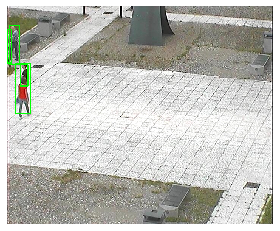

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

left = 5
top = 51
width = 28
height = 104
left1 = 23
top1 = 151
width1 = 39
height1 = 133
left2 = 35
top2 = 155
width2 = 20
height2 = 56
left3 = 1
top3 = 61
width3 = 11
height3 = 89

#file = './predictions.jpg'
file = './video0320.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  cv2.rectangle(show_img,(left,top),(left+width,top + height),(0,255,0),2)
  cv2.rectangle(show_img,(left1,top1),(left1+width1,top1 + height1),(0,255,0),2)
  cv2.rectangle(show_img,(left2,top2),(left2+width2,top2 + height2),(0,255,0),2)
  cv2.rectangle(show_img,(left3,top3),(left3+width3,top3 + height3),(0,255,0),2)
  plt.imshow(show_img)

In [0]:
!ls results

In [0]:
!cp res.avi "/content/gdrive/My Drive/res3.avi"

In [0]:
!cp "/content/gdrive/My Drive/video0320.jpg" video0320.jpg


In [0]:
ls

ckpts/        get_images.py*    roi.jpg*                siamese_train.py*
deep_sort/    __pycache__/      siamese_dataloader.py*  test_on_video.py*
deepsort.py*  README.md         siamese_net.py*
det/          requirements.txt  siamese_test.py*


In [0]:
out

<VideoWriter 0x7f1388cf4210>

In [0]:
track.track_id

1